# Лабораторная работа №1. Методы оптимизации
*Кузнецов Максим, РК6-63б*

Предложенная функция одной переменной, наиболее точно аппроксимирующую заданную выборку: 


$$f(x)=(bx^2-x)*sin(ax-1.6)$$

 Данная функция была получена в результате произведения квадратичной функции $x^2+x+1$ и периодической функции $sin(x),$ так как изначально можно было заметить, что заданная выборка имеет свойство периодичности. 
 В процессе оптимизации функция $f(x)$ была преобразована, чтобы лучше аппроксимизировать выборку.
Полученные отклонения: cреднеквадратичное: $0.848$, максимальное: $2.137$

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as scopt
import csv
import operator

In [26]:
def csv_reader(file_obj):
    reader = csv.reader(file_obj)
    data = []
    for row in reader:
        node = " ".join(row).split(" ")
        data.append((float(node[0]), float(node[1])))
    return data

csv_path = "lab1.csv"

with open(csv_path, "r") as f_obj:
    data = csv_reader(f_obj)

n = len(data)
X = [0 for i in range(n)]
Y = [0 for i in range(n)]

for i in range(len(data)):
    X[i] = float(data[i][0])
    Y[i] = float(data[i][1])

rec = {}
for i in range(n):
    rec.update({X[i]: Y[i]})

sorted_rec = sorted(rec.items(), key=operator.itemgetter(0))

for i in range(n):
    X[i] = sorted_rec[i][0]
    Y[i] = sorted_rec[i][1]

In [39]:
def dosDiff(pointsY, approxPointsY):
    result = 0
    for i in range(len(pointsY)):
        result += (pointsY[i] - approxPointsY[i]) ** 2
    result /= len(pointsY)
    result = np.sqrt(result)
    return result

def maxDiff(pointsY, approxPointsY):
    max_dist = 0
    for i in range(len(pointsY)):
        if (abs(pointsY[i] - approxPointsY[i]) > max_dist):
            max_dist = abs(pointsY[i] - approxPointsY[i])
    return max_dist

num_of_points = 100

arrayX = np.linspace(-11, 11, num_of_points)

def approximationFunc(x, a, b):
    res = [0] * (len(x))
    for i in range(len(x)):
        res[i] =  np.sin(a*x[i]-1.6)*(b*x[i]**2-x[i])
    return res

funcCoeffs = scopt.curve_fit(approximationFunc, X, Y)[0]
# print(funcCoeffs)

def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

print("coeff a = ", toFixed(funcCoeffs[0], 3))
print("coeff b = ", toFixed(funcCoeffs[1], 3))


arrayY = approximationFunc(arrayX, funcCoeffs[0], funcCoeffs[1])

coeff a =  0.809
coeff b =  1.069


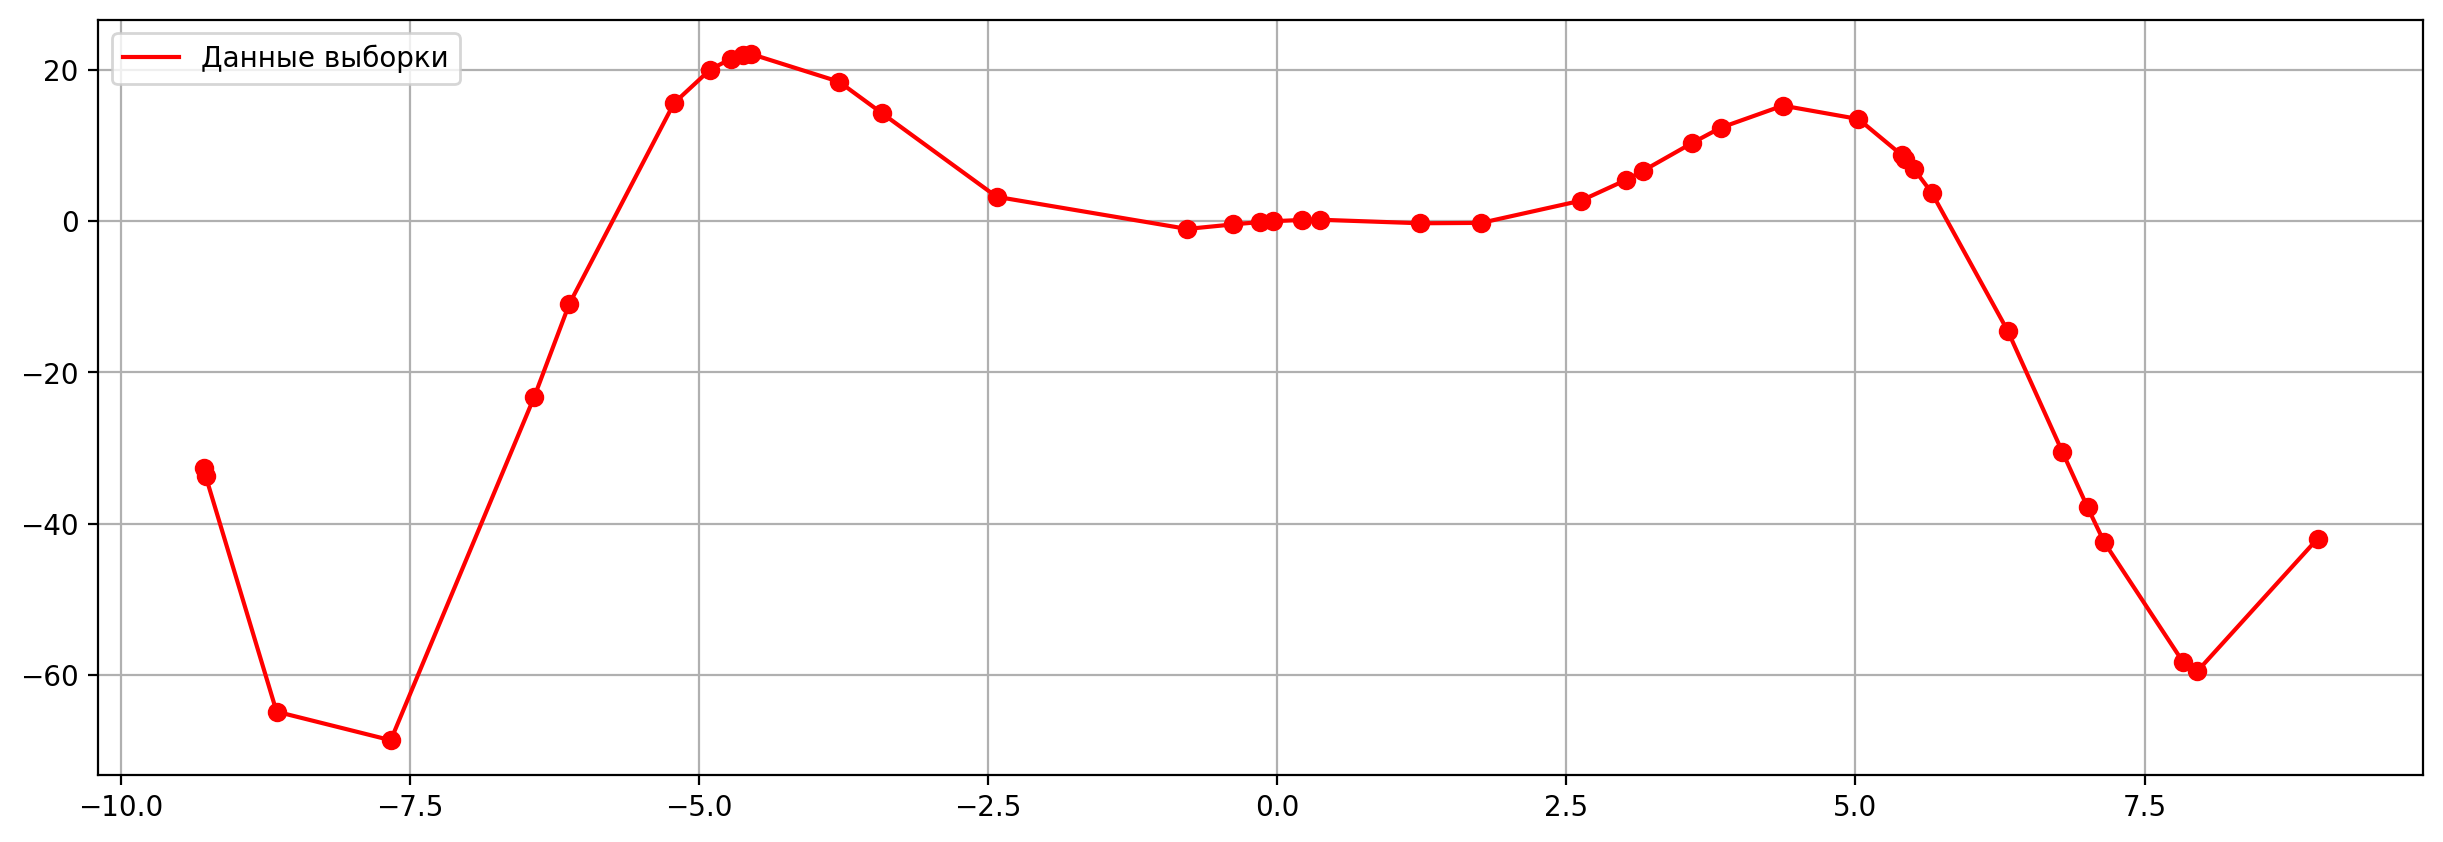

In [30]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 5), dpi=200)
axis.plot(X, Y, 'r', label="Данные выборки")
axis.plot(X, Y, 'o', color='red')
axis.legend(loc='upper left')
axis.grid()
plt.show()

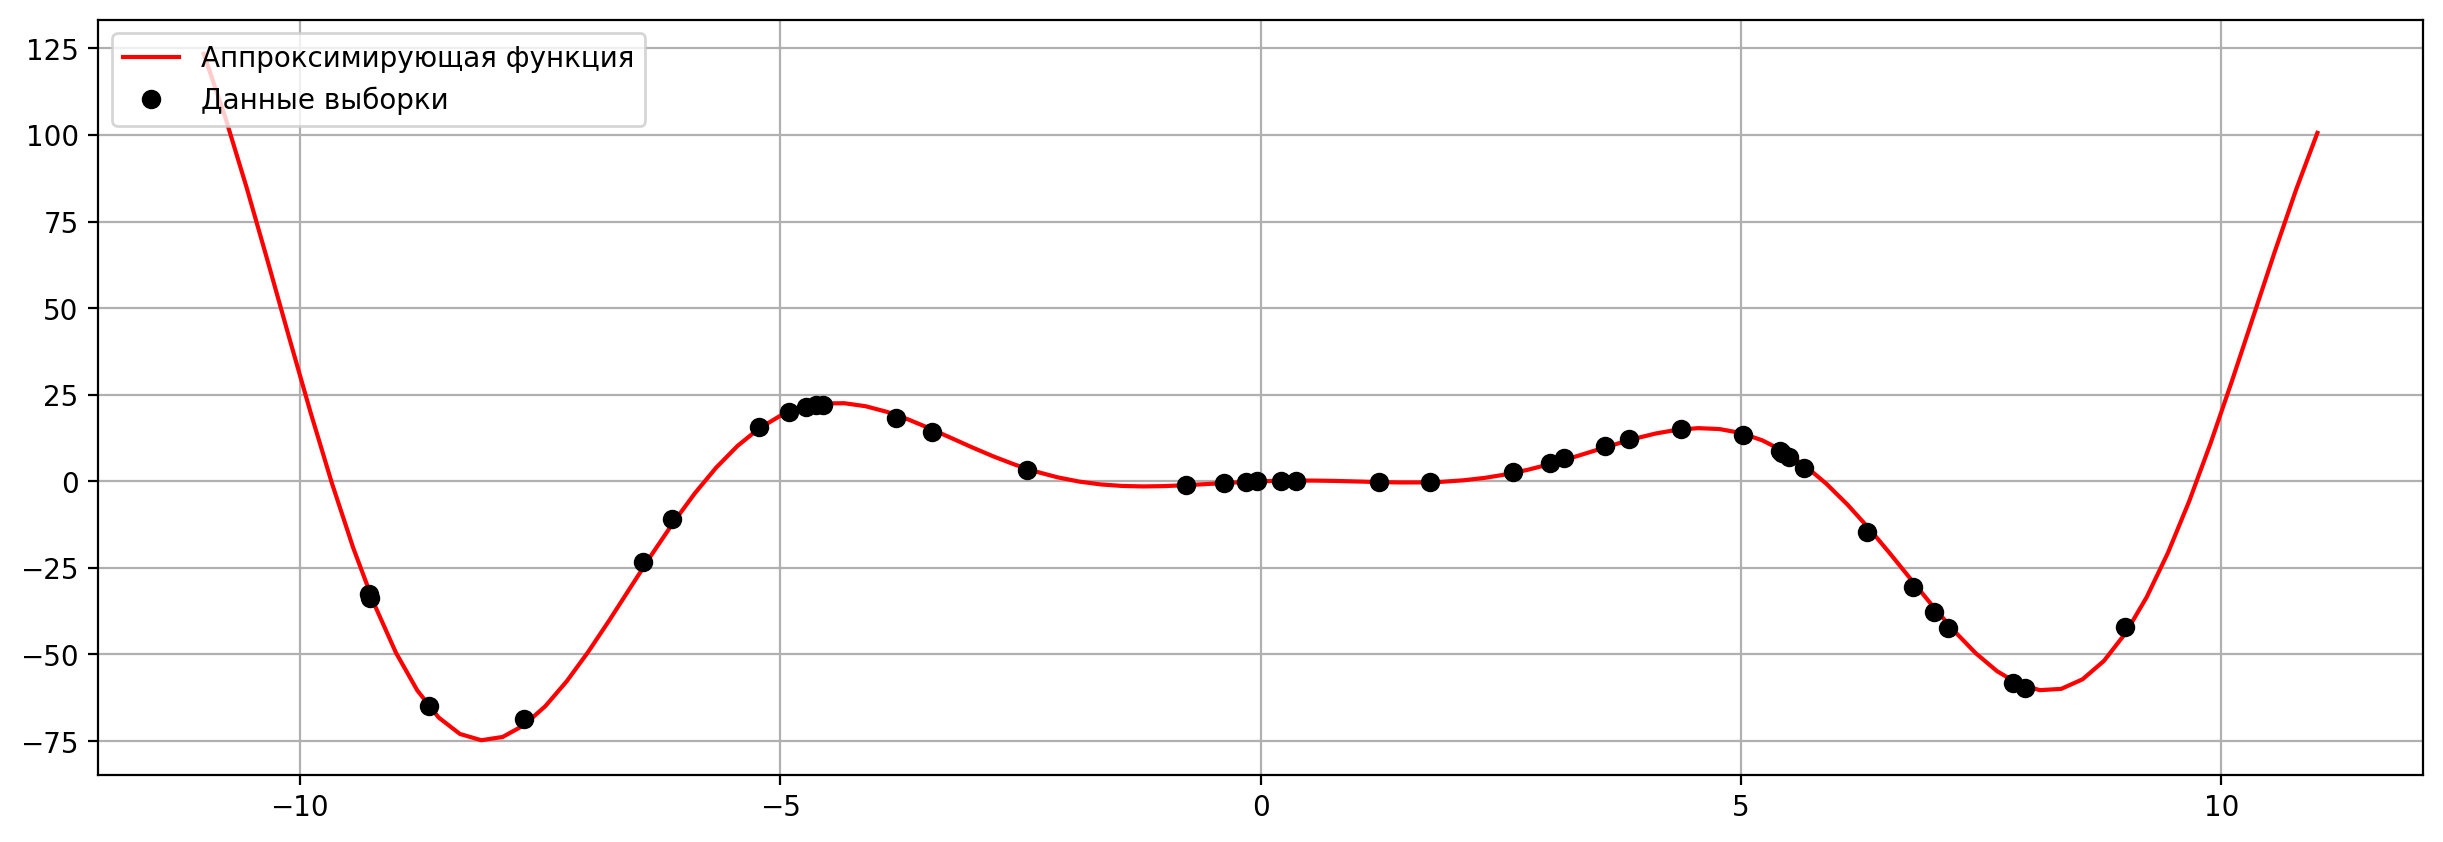

Среднеквадратичное отклонение:0.8486110657440773
Максимальное отклонение:2.1371918501805567


In [40]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 5), dpi=200)
axis.plot(arrayX, arrayY, color ='red', label ="Аппроксимирующая функция")
axis.plot(X, Y, 'o', label="Данные выборки", color='black')
axis.legend(loc='upper left')
axis.grid()
plt.show()

y_array_fin = approximationFunc(X, funcCoeffs[0], funcCoeffs[1])

print("Среднеквадратичное отклонение:{}".format(dosDiff(Y, y_array_fin)))
print("Максимальное отклонение:{}".format(maxDiff(Y, y_array_fin)))

# Необязательное доп. задание:

Не всегда существует набор данных, по которому можно легко определить функцию аппроксимизации.Существует множество способов поиска наилучшего аппроксиматора. Один из них - метод наименьших квадратов путем линеаризации требуемых зависимостей.Суть МНК заключается в выборе в качестве «меры близости» суммы квадратов отклонений левых и правых частей Этот метод позволяет аппроксимировать экспериментальные зависимости с достаточно высокой точностью. Также существуют метод аналитического выравнивания.
Еще один способ, но для частных случаев - перевод графика в логарифмические координаты. Тогда степенная зависимость станет наклонным отрезком, по наклону легко определяется показатель степени. Экспонента становится отрезком прямой, если ось абсцисс оставить в обычном, нелогарифмическом масштабе, а логарифм - наоборот, если ось ординат в обычном, а ось абсцисс - в логарифмическом. 